In [2]:
! cp -r /content/drive/My\ Drive/machine_learning /content

In [1]:
import os
os.chdir("/content/machine_learning")

In [2]:
import bbnn_models
import cnn_models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from model_utils import ModelUtils, ModelAnalytics
from data_loader import FeatureDataset

plt.style.use('default')
drive_dir = "/content/drive/My Drive/machine_learning"
pth_dir = f"{drive_dir}/pths"
loss_dir = f"{drive_dir}/losses"

In [3]:
train_dataset = FeatureDataset("cqt", "train")
validate_dataset = FeatureDataset("cqt", "validate")
test_dataset = FeatureDataset("cqt", "test")

criterion = nn.CrossEntropyLoss()

In [4]:
model = bbnn_models.CQTBBNN().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [ ]:
mutils.train(n_epochs=60, pth_dir=pth_dir, loss_dir=loss_dir)

Evaluating pths for epochs:  0 (2min 5.3s), 5 (2min 55.3s), 10 (3min 45.7s), 15 (4min 36.1s), 20 (5min 26.8s), 25 (6min 17.1s), 30 (7min 7.7s), 35 (7min 58.1s), 40 (8min 48.4s), 45 (9min 38.8s), 50 (10min 29.2s), 55 (11min 19.7s), 60 (12min 10.1s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.6271 at epoch 50
Maximum validate accuracy: 0.565 at epoch 50
Maximum test accuracy: 0.51 at epoch 40

AT EPOCH 40
Macro Test AUC: 0.8329, Accuracy: 0.51

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.8979, Accuracy of 0.54
 - Experimental: AUC of 0.7407, Accuracy of 0.31
 - Folk: AUC of 0.8145, Accuracy of 0.62
 - Hip-Hop: AUC of 0.9441, Accuracy of 0.85
 - Instrumental: AUC of 0.8603, Accuracy of 0.38
 - International: AUC of 0.8825, Accuracy of 0.46
 - Pop: AUC of 0.6101, Accuracy of 0.25
 - Rock: AUC of 0.9038, Accuracy of 0.67
Can't find /content/drive/My Drive/machine_learning/losses/cqt_bbnn_cqt.npy


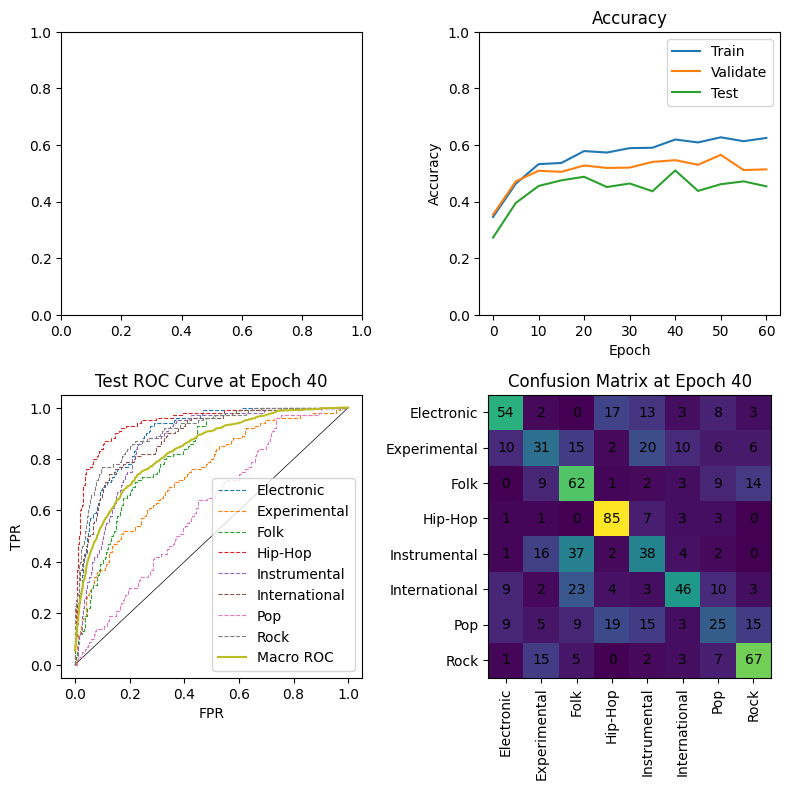

In [5]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=60, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)